In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import matplotlib.gridspec as gridspec

# Variables aleatorias discretas

## Distribucion categórica

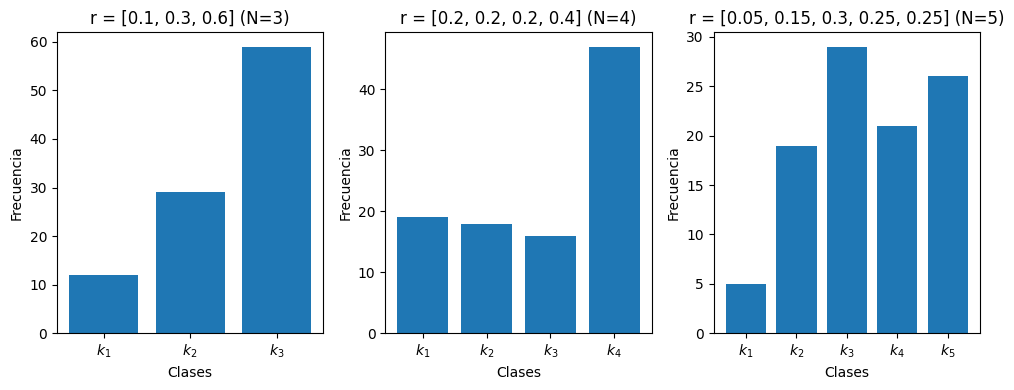

In [2]:
categorical_distributions = [
    [0.1, 0.3, 0.6],
    [0.2, 0.2, 0.2, 0.4],
    [0.05, 0.15, 0.3, 0.25, 0.25]
]

n_samples = 100

plt.figure(figsize=(10, 4))

for i, probs in enumerate(categorical_distributions):

    samples = np.random.choice(len(probs), size=n_samples, p=probs)
    _, counts = np.unique(samples, return_counts=True)
    labels = [fr'$k_{k+1}$' for k in range(len(probs))]

    plt.subplot(1, 3, i + 1)
    plt.bar(labels, counts)
    plt.xlabel('Clases')
    plt.ylabel('Frecuencia')
    plt.title(f'r = {probs} (N={len(probs)})')
    
plt.tight_layout()
plt.show()

# Variables aleatorias continuas

## Ejemplo simple

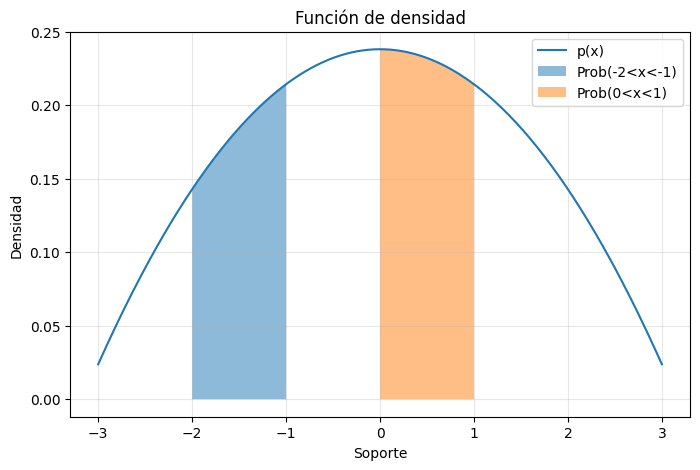

In [3]:
def p_x(x):
    return (10 - x**2) / 42

support = np.linspace(-3, 3, 400)
density = p_x(support)

plt.figure(figsize=(8, 5))
plt.plot(support, density, label='p(x)')

for interval in [-2, -1], ([0, 1]):
    x_min, x_max = interval
    x_fill = np.linspace(x_min, x_max, 200)
    y_fill = p_x(x_fill)
    plt.fill_between(x_fill, y_fill, alpha=0.5,  label=f'Prob({x_min}<x<{x_max})')

plt.xlabel('Soporte')
plt.ylabel('Densidad')
plt.title('Función de densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Gaussianas 1D

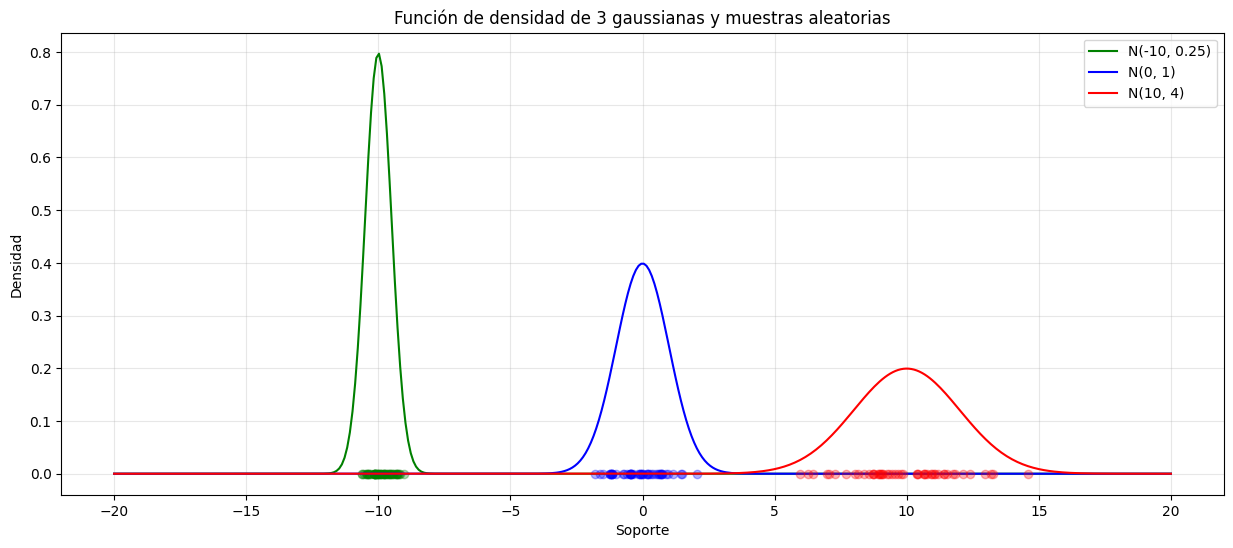

In [4]:
mus = [-10, 0, 10]
sigmas = [1/2, 1, 2]
color = ['g', 'b', 'r']

x = np.linspace(-20, 20, 400)
n_samples = 50

plt.figure(figsize=(15, 6))

for mu, sigma, color in zip(mus, sigmas, color):

    density = norm.pdf(x, mu, sigma)
    plt.plot(x, density, color=color, label=f'N({mu}, {sigma**2})')
    
    samples = np.random.normal(mu, sigma, n_samples)
    plt.plot(samples, np.zeros_like(samples), 'o', alpha=0.3, color=color)

plt.xlabel('Soporte')
plt.ylabel('Densidad')
plt.title('Función de densidad de 3 gaussianas y muestras aleatorias')
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)
plt.show()

## Gaussianas 2D

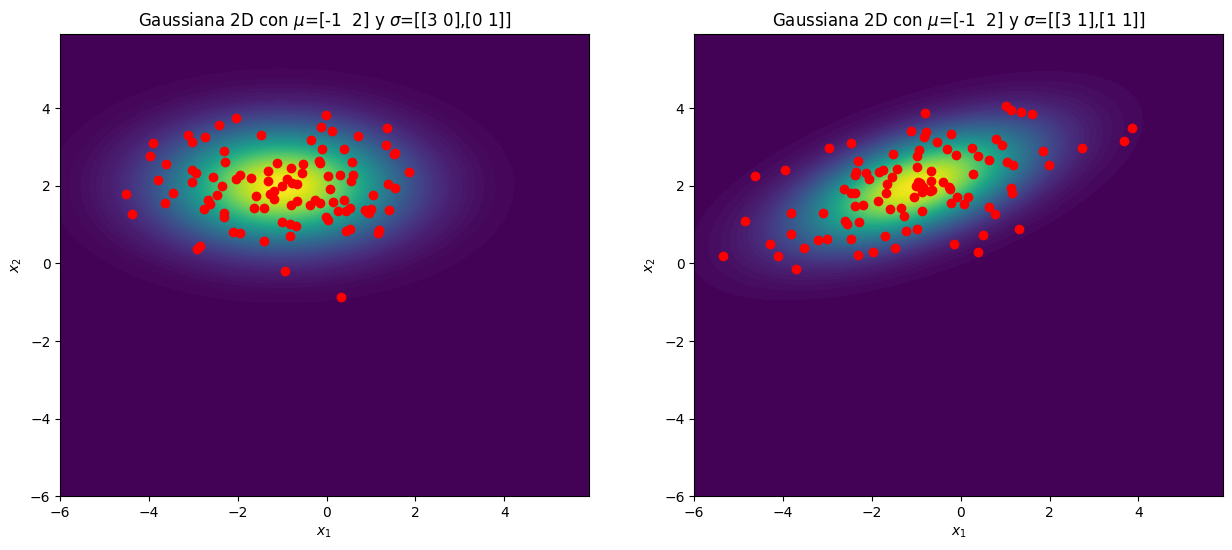

In [5]:
mu1 = np.array([-1, 2])
cov1 = np.array([[3, 0], [0, 1]])

mu2 = np.array([-1, 2])
cov2 = np.array([[3, 1], [1, 1]])

means = [mu1, mu2]
covs = [cov1, cov2]

x, y = np.mgrid[-6:6:0.1, -6:6:0.1]
pos = np.dstack((x, y))
n_samples = 100

plt.figure(figsize=(15, 6))
for i, (mu, sigma) in enumerate(zip(means, covs)):
    z = multivariate_normal(mu, sigma).pdf(pos)
    samples = np.random.multivariate_normal(mu, sigma, n_samples)
    plt.subplot(1, 2, i + 1)
    plt.contourf(x, y, z, cmap='viridis', levels=100)
    plt.scatter(mu[0], mu[1], c='red')
    plt.scatter(samples[:, 0], samples[:, 1], c='red')
    plt.title(fr'Gaussiana 2D con $\mu$={mu} y $\sigma$=[{sigma[0]},{sigma[1]}]')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
plt.show()

## Marginales de una gaussiana 2D

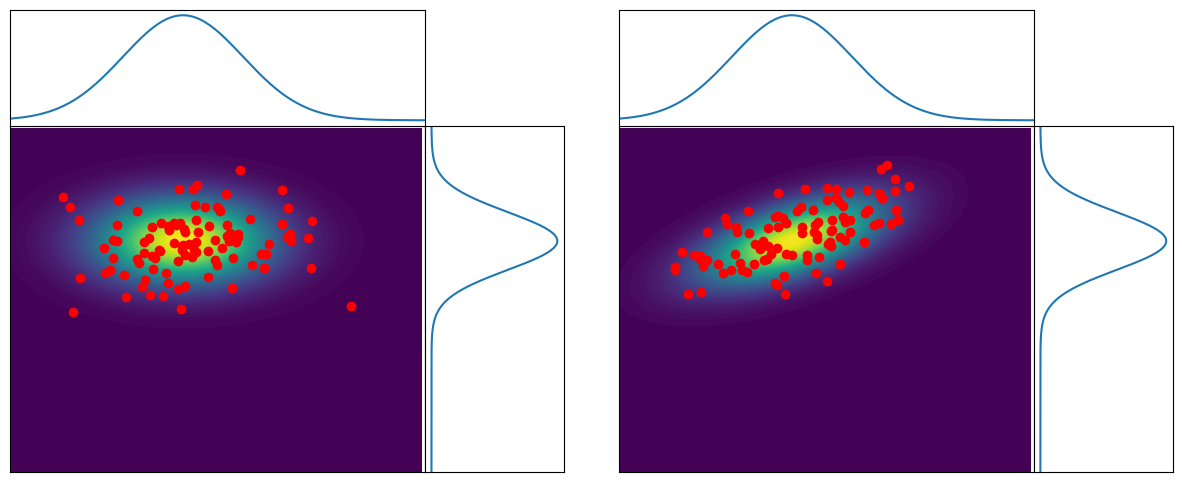

In [6]:
mu1 = np.array([-1, 2])
cov1 = np.array([[3, 0], [0, 1]])
mu2 = np.array([-1, 2])
cov2 = np.array([[3, 1], [1, 1]])
means = [mu1, mu2]
covs = [cov1, cov2]

x, y = np.mgrid[-6:6:0.1, -6:6:0.1]
pos = np.dstack((x, y))
n_samples = 100

fig = plt.figure(figsize=(15, 6))
outer_gs = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0)

for i, (mu, sigma) in enumerate(zip(means, covs)):
    inner_gs = gridspec.GridSpecFromSubplotSpec(4, 4, subplot_spec=outer_gs[i], wspace=0, hspace=0)
    ax_main = fig.add_subplot(inner_gs[1:4, 0:3])
    ax_top = fig.add_subplot(inner_gs[0, 0:3], sharex=ax_main)
    ax_right = fig.add_subplot(inner_gs[1:4, 3], sharey=ax_main)
    z = multivariate_normal(mu, sigma).pdf(pos)
    samples = np.random.multivariate_normal(mu, sigma, n_samples)
    ax_main.contourf(x, y, z, levels=100)
    ax_main.scatter(samples[:, 0], samples[:, 1], c='red')

    x_vals = np.linspace(-6, 6, 300)
    pdf_x = norm(mu[0], np.sqrt(sigma[0, 0])).pdf(x_vals)
    ax_top.plot(x_vals, pdf_x)
    ax_top.set_xlim([-6, 6])
    ax_top.set_xticks([])
    ax_top.set_yticks([])
    y_vals = np.linspace(-6, 6, 300)
    pdf_y = norm(mu[1], np.sqrt(sigma[1, 1])).pdf(y_vals)
    ax_right.plot(pdf_y, y_vals)
    ax_right.set_ylim([-6, 6])
    ax_right.set_xticks([])
    ax_right.set_yticks([])
plt.show()